In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.metrics import accuracy_score
import timeit
import matplotlib.pyplot as plt
import time

Data Loading


In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
x_train = x_train[:50000]
y_train = y_train[:50000]

x_train = x_train.reshape(50000, 784)
x_test = x_test.reshape(10000, 784)

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
n_classes = 10
y_train_targets = y_train.reshape(-1)
y_train = np.eye(n_classes)[y_train_targets]

n_classes = 10
y_test_targets = y_test.reshape(-1)
y_test = np.eye(n_classes)[y_test_targets]

In [0]:
def  find_loss(weight,X,y):
    n = len(y)
    pred = X.dot(weight)
    loss = (1/2*n) * np.sum(np.square(pred-y))
    return loss

def change_to_categorical(input_arr, size):
  for i in range(size):
    max_i = (np.argmax(input_arr[i, :]))
    input_arr[i, :] = np.zeros(10)
    input_arr[i,max_i] = 1
  return input_arr


In [0]:

def sgd(X,y,weight,l_r,iteration,batch_size):

    n = len(y)
    loss_arr = np.zeros(iteration)
    
    for iter in range(iteration):
        loss =0.0
        rand = np.random.permutation(n)
        X = X[rand]
        y = y[rand]
        for i in range(0,n,batch_size):
            x_new = X[i:i+batch_size]
            y_new = y[i:i+batch_size]

            pred = np.dot(x_new,weight)
            weight = weight -(1/n)*l_r* ( x_new.T.dot((pred - y_new)))
        loss += find_loss(weight,X,y)
        loss_arr[iter]  = loss
        
    return weight, loss_arr

Batch-wise Accuracy and Loss

In [126]:
acc1 = []
acc10 = []
acc100 = []
acc1000 = []
lr = 0.5

#Batch 1   
print("batch_size = 1:")
for it in [1,10,20,50,100]:
  weight = np.zeros((x_train.shape[1],10))
  begin = time.time()
  weight, loss_arr1 = sgd(x_train,y_train,weight,lr,it, 1)
  end = time.time()
  print(it," : Time = ", end-begin)

  #Accuracy:
  predicted_ytest = x_test.dot(weight)
  predicted_ytest = change_to_categorical(predicted_ytest, 10000)
  acc1.append(accuracy_score(predicted_ytest, y_test))

print("batch_size = 10:")
for it in [1,10,20,50,100]:
  weight = np.zeros((x_train.shape[1],10))
  begin = time.time()
  weight, loss_arr10 = sgd(x_train,y_train,weight,lr,it, 10)
  end = time.time()
  print(it," : Time = ", end-begin)

  #Accuracy:
  predicted_ytest = x_test.dot(weight)
  predicted_ytest = change_to_categorical(predicted_ytest, 10000)
  acc10.append(accuracy_score(predicted_ytest, y_test))

print("batch_size = 100:")
for it in [1,10,20,50,100]:
  weight = np.zeros((x_train.shape[1],10))
  begin = time.time()
  weight, loss_arr100 = sgd(x_train,y_train,weight,lr,it, 100)
  end = time.time()
  print(it," : Time = ", end-begin)

  #Accuracy:
  predicted_ytest = x_test.dot(weight)
  predicted_ytest = change_to_categorical(predicted_ytest, 10000)
  acc100.append(accuracy_score(predicted_ytest, y_test))

print("batch_size = 1000:")
for it in [1,10,20,50,100]:
  weight = np.zeros((x_train.shape[1],10))
  begin = time.time()
  weight, loss_arr1000 = sgd(x_train,y_train,weight,lr,it, 1000)
  end = time.time()
  print(it," : Time = ", end-begin)

  #Accuracy:
  predicted_ytest = x_test.dot(weight)
  predicted_ytest = change_to_categorical(predicted_ytest, 10000)
  acc1000.append(accuracy_score(predicted_ytest, y_test))

  


batch_size = 1:
1  : Time =  1.3802299499511719
10  : Time =  14.092346906661987
20  : Time =  27.763222455978394
50  : Time =  69.59968185424805
100  : Time =  139.23712873458862
batch_size = 10:
1  : Time =  0.44670939445495605
10  : Time =  4.5354859828948975
20  : Time =  9.109310626983643
50  : Time =  22.720091104507446
100  : Time =  45.59395241737366
batch_size = 100:
1  : Time =  0.3731245994567871
10  : Time =  3.7390642166137695
20  : Time =  7.471063613891602
50  : Time =  18.610449075698853
100  : Time =  37.24329662322998
batch_size = 1000:
1  : Time =  0.3597753047943115
10  : Time =  3.5878419876098633
20  : Time =  9.97274136543274
50  : Time =  18.714553594589233
100  : Time =  36.1790611743927


Plots for Loss vs Iterations

Text(0, 0.5, 'Loss')

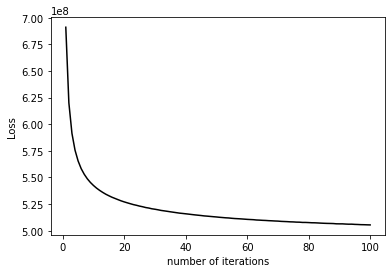

In [127]:
#Loss vs iterations : 1
iteration_number = [x for x in range(1,101)]
plt.plot(iteration_number, loss_arr1, color='black')
plt.xlabel("number of iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

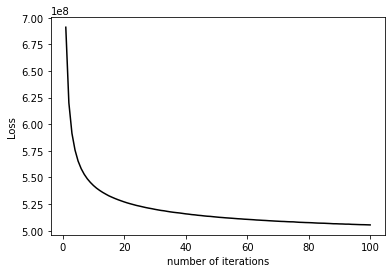

In [128]:
#Loss vs iterations : 10
iteration_number = [x for x in range(1,101)]
plt.plot(iteration_number, loss_arr10, color='black')
plt.xlabel("number of iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

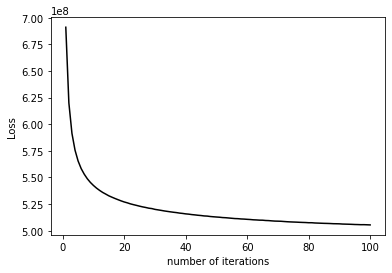

In [129]:
#Loss vs iterations : 100
iteration_number = [x for x in range(1,101)]
plt.plot(iteration_number, loss_arr100, color='black')
plt.xlabel("number of iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

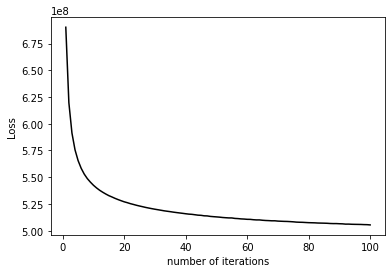

In [130]:
#Loss vs iterations : 1000
iteration_number = [x for x in range(1,101)]
plt.plot(iteration_number, loss_arr1000, color='black')
plt.xlabel("number of iterations")
plt.ylabel("Loss")

Plot for Accuracy vs Iterations

Text(0, 0.5, 'Accuracy')

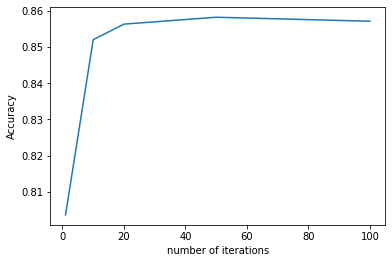

In [131]:
#Accuracy vs Iterations : 1
iteration_number = [x for x in range(1,101)]
plt.plot([1,10,20,50,100], acc1)
plt.xlabel("number of iterations")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

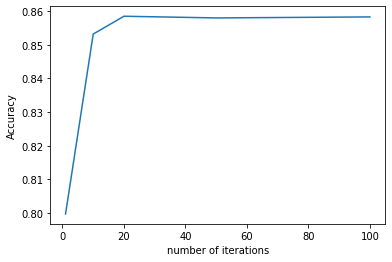

In [132]:
#Accuracy vs Iterations : 10
iteration_number = [x for x in range(1,101)]
plt.plot([1,10,20,50,100], acc10)
plt.xlabel("number of iterations")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

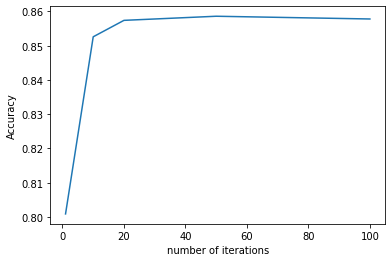

In [133]:
#Accuracy vs Iterations : 100
iteration_number = [x for x in range(1,101)]
plt.plot([1,10,20,50,100], acc100)
plt.xlabel("number of iterations")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

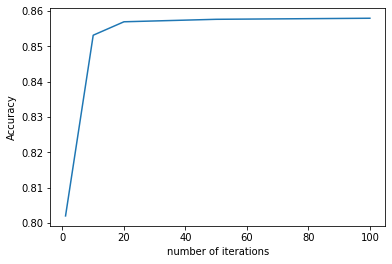

In [134]:
#Accuracy vs Iterations : 1000
iteration_number = [x for x in range(1,101)]
plt.plot([1,10,20,50,100], acc1000)
plt.xlabel("number of iterations")
plt.ylabel("Accuracy")

Using Different Dataset Sizes

In [141]:
acc100 = []
lr = 0.5
batch_size = 100
for it in [100, 500, 1000, 10000]:
  weight = np.zeros((x_train[:it].shape[1],10))
  weight, loss_arr = minibatch_gradient_descent(x_train[:it],y_train[:it],weight,lr,200, 100)

  predicted_ytest = x_test.dot(weight)
  predicted_ytest = change_to_categorical(predicted_ytest, 10000)
  acc100.append(accuracy_score(predicted_ytest, y_test))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


Text(0, 0.5, 'Accuracy')

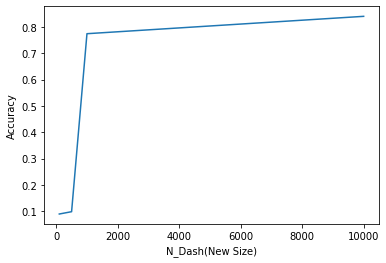

In [142]:
plt.plot(N_dash, acc100)
plt.xlabel("N_Dash(New Size)")
plt.ylabel("Accuracy")